In [1]:
#Basic and most important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model Evaluation tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [2]:
#default theme
sns.set_theme(palette='tab10',
             font='Lucida Calligraphy',
             font_scale=1.0,
             style='darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size':10})
plt.style.use('dark_background')

In [3]:
df=pd.read_csv("loan_prediction.csv")


In [4]:
df.sample(10).style.background_gradient(cmap='coolwarm')

In [5]:
df.shape

(614, 13)

In [6]:
df.describe().style.background_gradient(cmap='rainbow')

In [7]:
categorical_columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']

In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

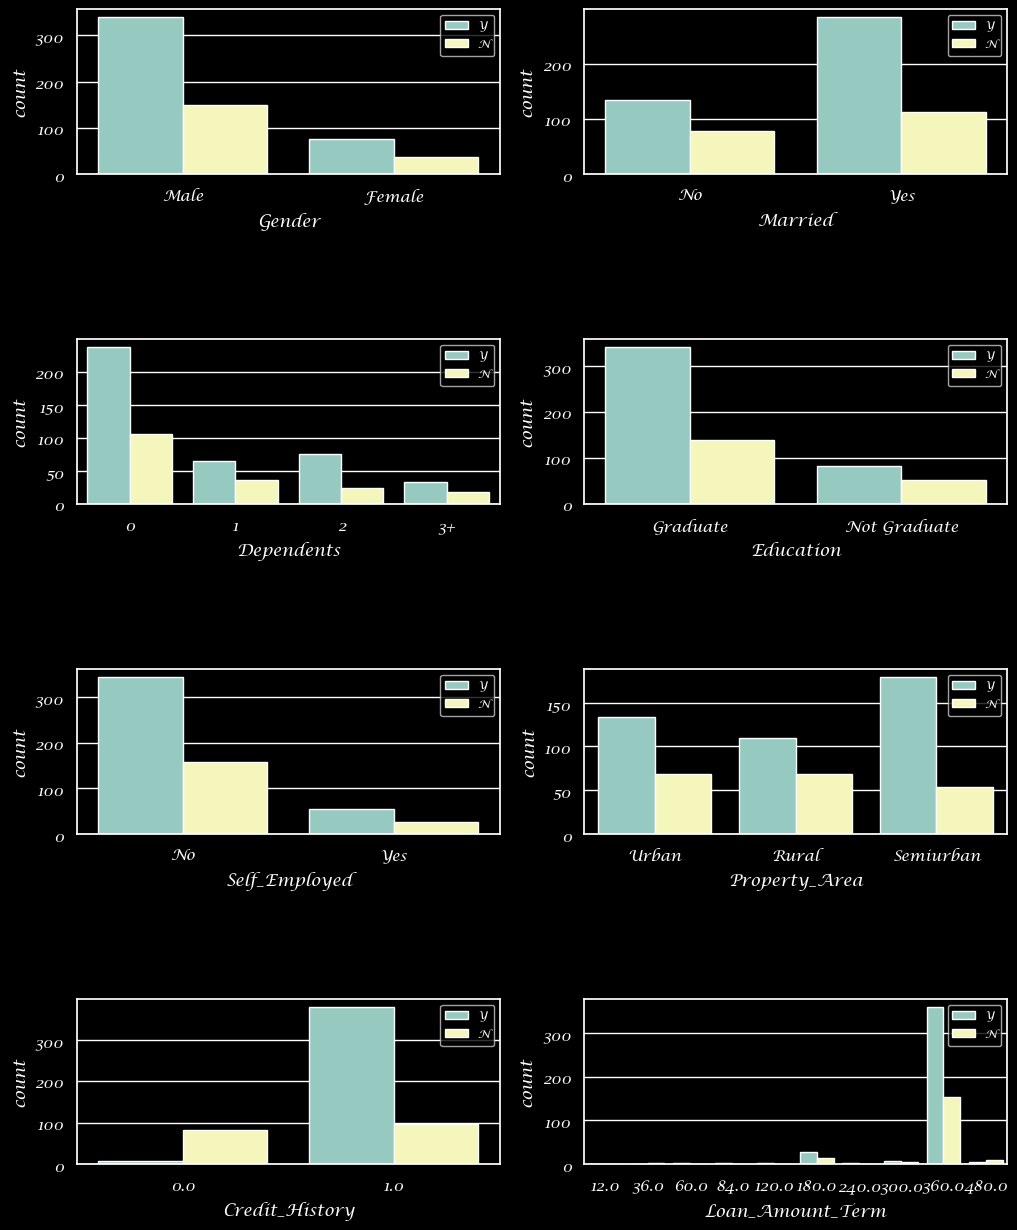

In [9]:
fig, axes=plt.subplots(4,2,figsize=(12,15))

for idx, cat_col in enumerate(categorical_columns):
    row, col=idx//2, idx%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=axes[row, col])
    axes[row, col].legend(fontsize='small') #set the fontsize for the legend
    
plt.subplots_adjust(hspace=1)
plt.show()

In [10]:
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


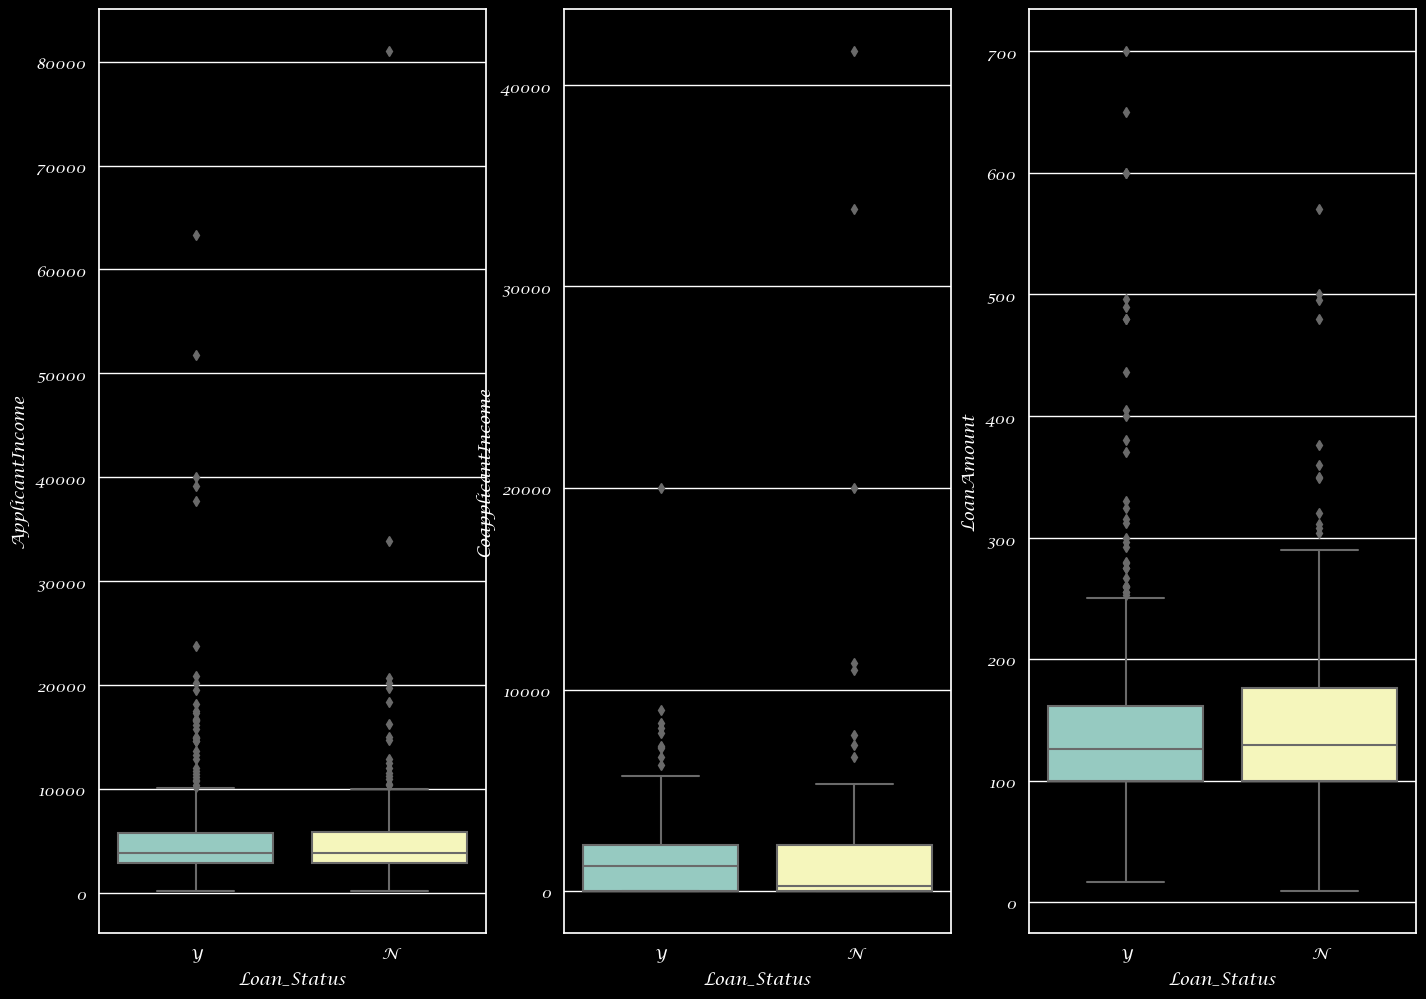

In [11]:
fig,axes=plt.subplots(1,3,figsize=(17,12))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])
    
print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

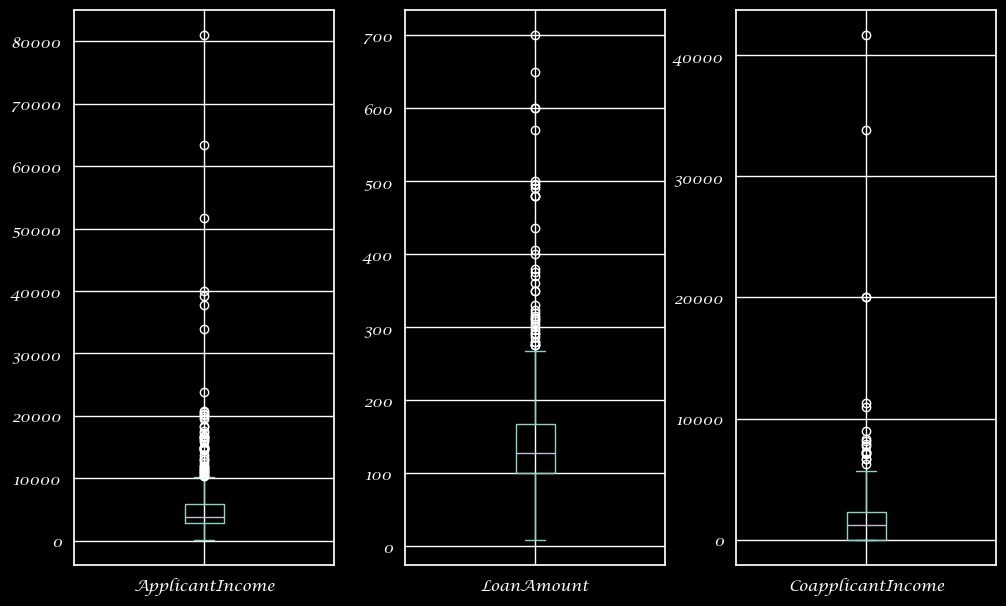

In [12]:
plt.subplot(131)
df['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
df['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
df['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

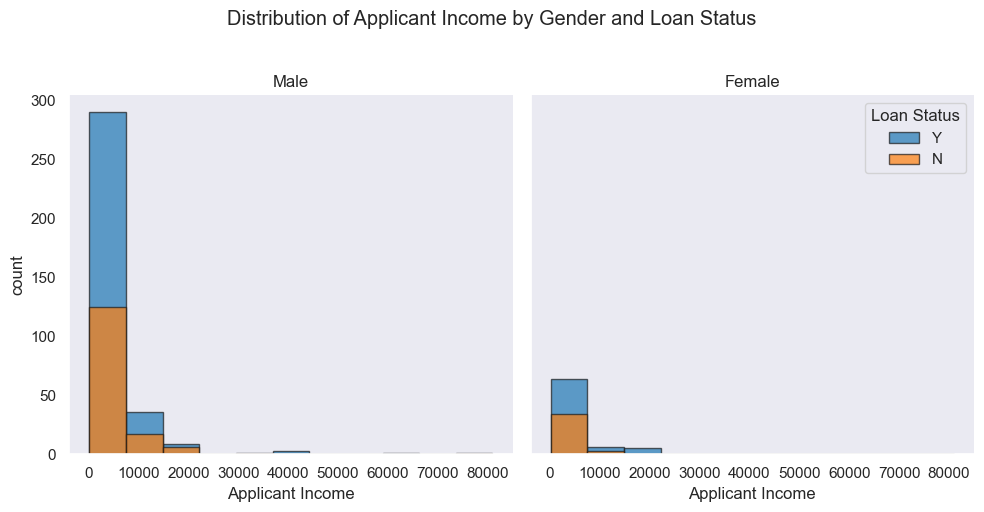

In [13]:
custom_palette=sns.color_palette("tab10",2)
bins=np.linspace(df['ApplicantIncome'].min(),df['ApplicantIncome'].max(),12)
sns.set(style="dark")
graph=sns.FacetGrid(df,col="Gender",hue="Loan_Status",palette=custom_palette,col_wrap=2,height=5)
graph.map(plt.hist, 'ApplicantIncome',bins=bins,ec="k",alpha=0.7)
graph.set_titles(col_template="{col_name}")
graph.axes[-1].legend(title='Loan Status', loc='upper right')
graph.set_axis_labels("Applicant Income","count")
graph.fig.suptitle("Distribution of Applicant Income by Gender and Loan Status",y=1.02)
plt.tight_layout()
plt.show()

In [14]:
correlation_mat=df.corr(numeric_only=True)

<Axes: >

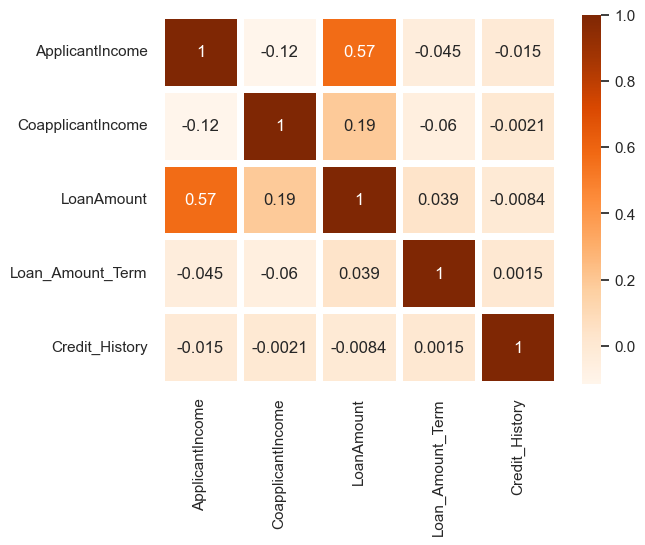

In [15]:
sns.heatmap(correlation_mat,annot=True,linewidths=5,cmap="Oranges")

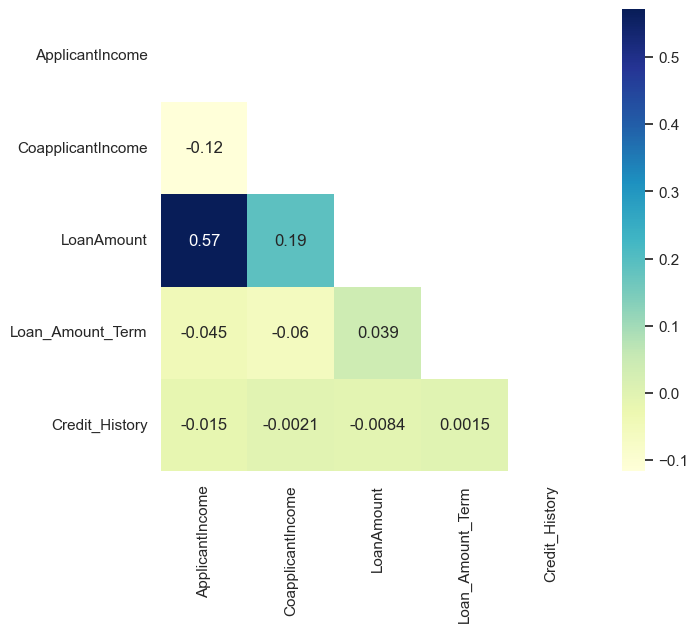

In [16]:
mask=np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(7,6))
    ax=sns.heatmap(correlation_mat,mask=mask,annot=True,cmap="YlGnBu")

# There is a positive correlation between ApplicantIncome and Loan Amount,Coapplicatantincome and LoanAmount

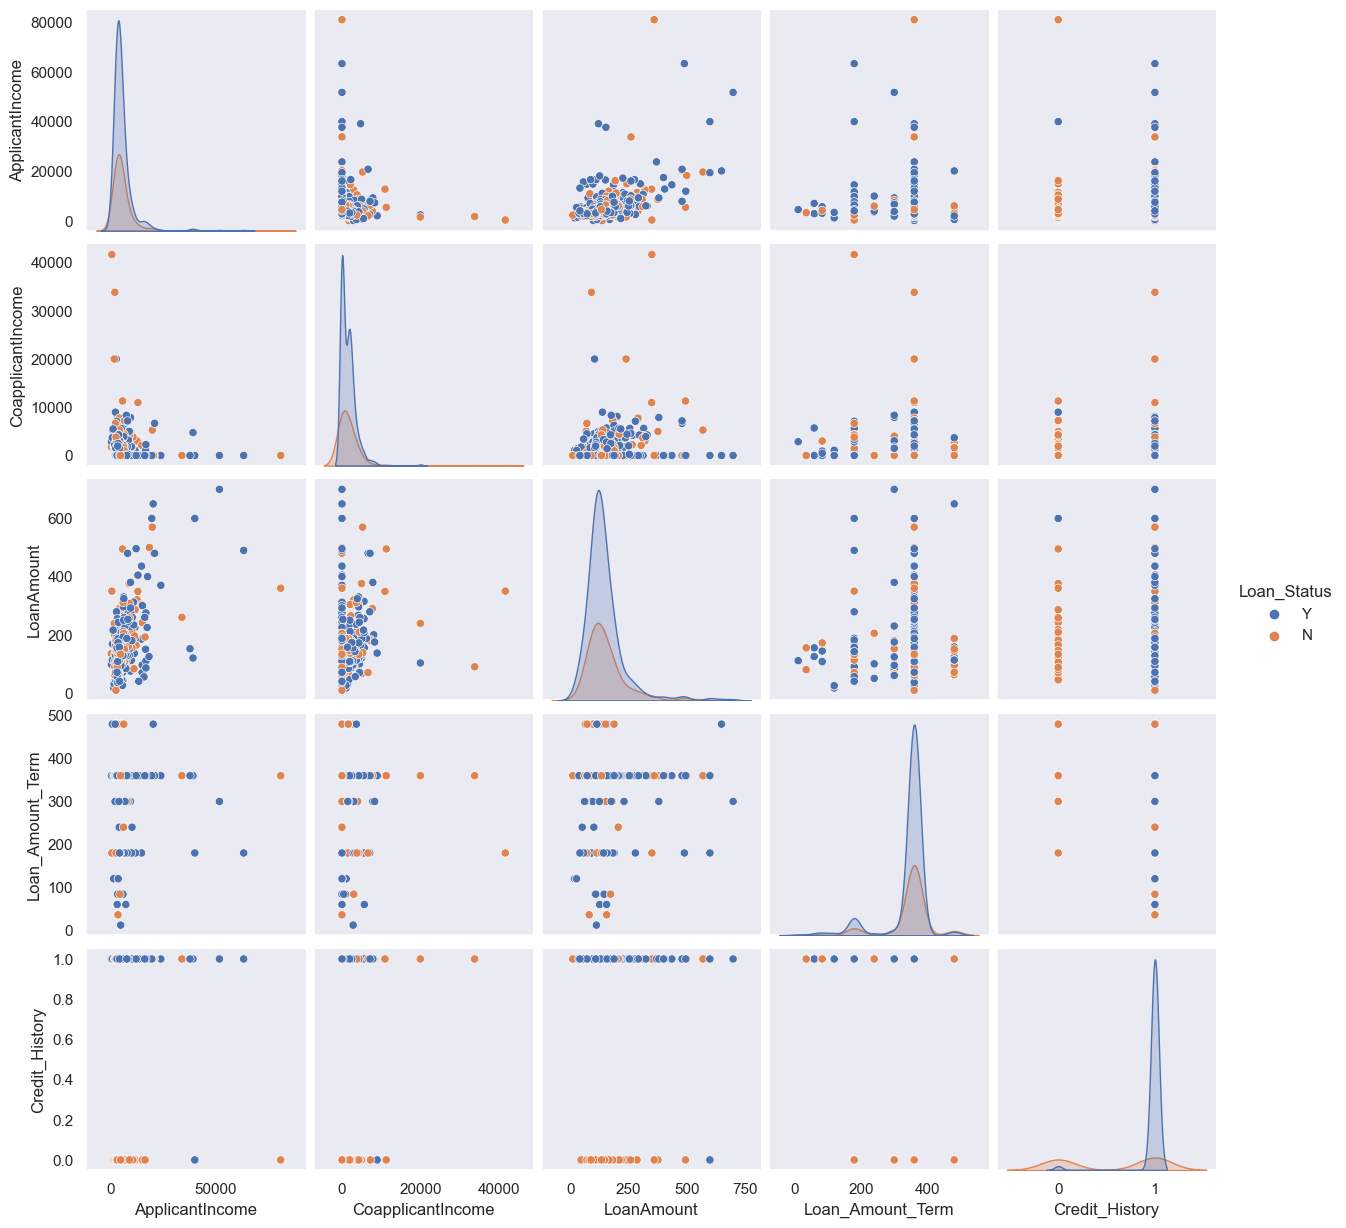

In [17]:
sns.pairplot(df,hue="Loan_Status")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

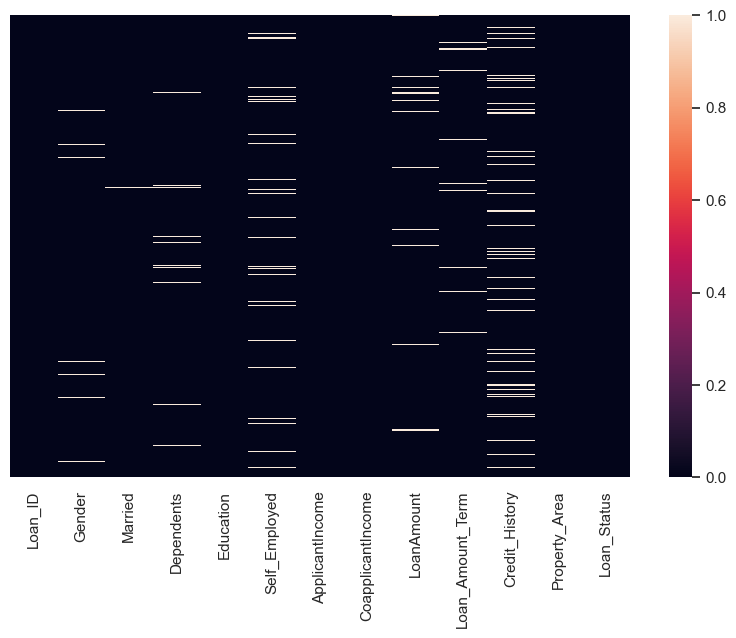

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [21]:
###checking if the non-categorical variables are normally distributed ot not i.e checking outliers....


print("Data distribution analysis:->------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(df["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(df["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(df["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(df["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(df["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(df["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(df["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(df["CoapplicantIncome"]))
print("LoanAmount: ",np.median(df["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(df["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(df["CoapplicantIncome"]))
print("LoanAmount: ",np.std(df["LoanAmount"]))

Data distribution analysis:->------------------------------------


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  146.41216216216216

Mode:->

ApplicantIncome:  2500
CoapplicantIncome:  0.0
LoanAmount:  nan

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  nan

Standard Deviation:->

ApplicantIncome:  6104.064856533888
CoapplicantIncome:  2923.8644597700627
LoanAmount:  85.51500809120331


In [22]:
fig=px.histogram(df["ApplicantIncome"],x="ApplicantIncome",y="ApplicantIncome")
fig.update_layout(title="ApplicantIncome")
fig.show()

fig=px.histogram(df["CoapplicantIncome"],x="CoapplicantIncome",y="CoapplicantIncome")
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig=px.histogram(df["LoanAmount"],x="LoanAmount",y="LoanAmount")
fig.update_layout(title="LoanAmount")
fig.show()

# Not normally distributed.

Prepare Data for model training i.e.removing outliers,filling null values,removing skewness

In [23]:
print(df["Gender"].value_counts())
print(df["Married"].value_counts())
print(df["Self_Employed"].value_counts())
print(df["Dependents"].value_counts())
print(df["Credit_History"].value_counts())
print(df["Loan_Amount_Term"].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

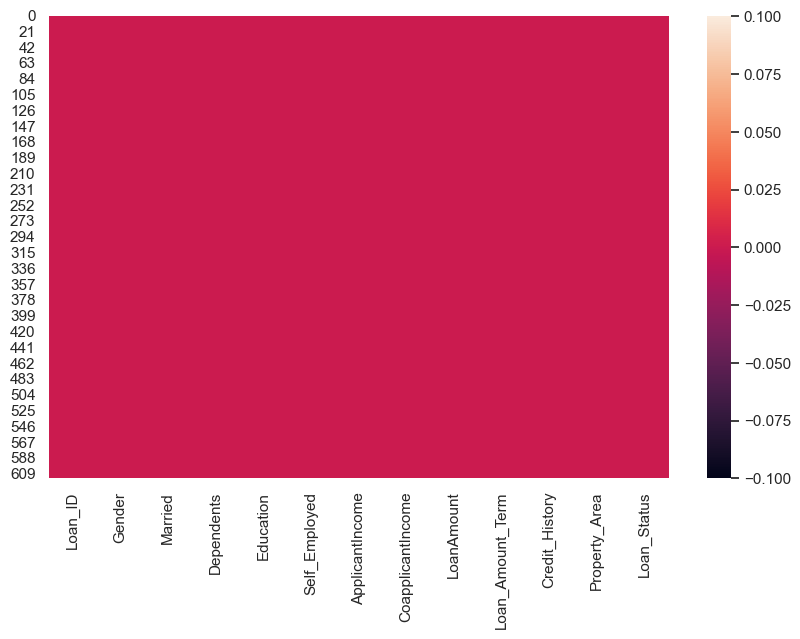

In [24]:
#Filling all Nan values with mode of respactive variable
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "Int" form.
df["Dependents"]=df["Dependents"].replace('3+',int(3))
df["Dependents"]=df["Dependents"].replace('1',int(1))
df["Dependents"]=df["Dependents"].replace('2',int(2))
df["Dependents"]=df["Dependents"].replace('0',int(0))

df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

print(df.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [25]:
######################################################################################
#Getting log value:-->

df["ApplicantIncome"]=np.log(df["ApplicantIncome"])
#As "CoapplicantIncome" columns has same "0" values we will get log values except "0"
df["CoapplicantIncome"]=[np.log(i) if i!=0 else 0 for i in df["CoapplicantIncome"]]
df["LoanAmount"]=np.log(df["LoanAmount"])
#####################################################################################

In [26]:
###checking if the non-categorical variables are normally distributed ot not i.e checking outliers....


print("After converting to normal distributed data:->------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(df["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(df["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(df["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(df["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(df["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(df["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(df["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(df["CoapplicantIncome"]))
print("LoanAmount: ",np.median(df["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(df["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(df["CoapplicantIncome"]))
print("LoanAmount: ",np.std(df["LoanAmount"]))

After converting to normal distributed data:->------------------------------------


Mean:->

ApplicantIncome:  8.341213093227006
CoapplicantIncome:  4.289733227820409
LoanAmount:  4.857250194811088

Mode:->

ApplicantIncome:  7.824046010856292
CoapplicantIncome:  0.0
LoanAmount:  4.852030263919617

Median:->

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:->

ApplicantIncome:  0.6447375297521025
CoapplicantIncome:  3.8725225987499146
LoanAmount:  0.49559166063018056


In [27]:
fig=px.histogram(df["ApplicantIncome"],x="ApplicantIncome",y="ApplicantIncome")
fig.update_layout(title="ApplicantIncome")
fig.show()

fig=px.histogram(df["CoapplicantIncome"],x="CoapplicantIncome",y="CoapplicantIncome")
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig=px.histogram(df["LoanAmount"],x="LoanAmount",y="LoanAmount")
fig.update_layout(title="LoanAmount")
fig.show()

In [28]:
df.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No           0      Graduate            No   
1  LP001003   Male     Yes           1      Graduate            No   
2  LP001005   Male     Yes           0      Graduate           Yes   
3  LP001006   Male     Yes           0  Not Graduate            No   
4  LP001008   Male      No           0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         8.674026           0.000000    4.852030             360.0   
1         8.430109           7.318540    4.852030             360.0   
2         8.006368           0.000000    4.189655             360.0   
3         7.856707           7.765569    4.787492             360.0   
4         8.699515           0.000000    4.948760             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [29]:
df["Gender"]=le.fit_transform(df["Gender"])
df["Married"]=le.fit_transform(df["Married"])
df["Education"]=le.fit_transform(df["Education"])
df["Self_Employed"]=le.fit_transform(df["Self_Employed"])
df["Property_Area"]=le.fit_transform(df["Property_Area"])
df["Loan_Status"]=le.fit_transform(df["Loan_Status"])

#df=pd.get_dummies(df)
df.head(5)

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          0              0   
1  LP001003       1        1           1          0              0   
2  LP001005       1        1           0          0              1   
3  LP001006       1        1           0          1              0   
4  LP001008       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         8.674026           0.000000    4.852030             360.0   
1         8.430109           7.318540    4.852030             360.0   
2         8.006368           0.000000    4.189655             360.0   
3         7.856707           7.765569    4.787492             360.0   
4         8.699515           0.000000    4.948760             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
#Dividing data into input X variable and target y variable
x=df.drop(["Loan_Status","Loan_ID"],axis=1)
y=df["Loan_Status"]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [68]:
model_log=LogisticRegression(max_iter=100,C=1.0)

In [69]:
model_log.fit(x_train,y_train)

LogisticRegression()

In [70]:
model_log.score(x_train,y_train)

0.8181818181818182

In [71]:
model_log.score(x_test,y_test)

0.7891891891891892

In [39]:
predictions=model_log.predict(x_test)

<Axes: >

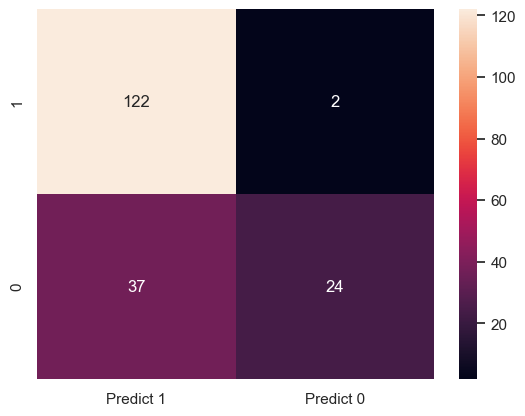

In [41]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions, labels=[1,0])
df_cm=pd.DataFrame (cm,index=[i for i in ["1","0"]],
                    columns=[i for i in["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')

In [72]:
model_dtc=DecisionTreeClassifier(max_depth=1,criterion='entropy')
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [73]:
model_dtc.score(x_train,y_train)

0.8181818181818182

In [74]:
model_dtc.score(x_test,y_test)

0.7891891891891892

In [49]:
from sklearn.ensemble import BaggingClassifier

In [51]:
m_b=BaggingClassifier()
m_b.fit(x_train,y_train)

BaggingClassifier()

In [54]:
model_dtc.score(x_train,y_train)

0.8181818181818182

In [55]:
model_dtc.score(x_test,y_test)

0.7891891891891892

In [263]:
m_abc=AdaBoostClassifier(random_state=1,n_estimators=1)
m_gbc=GradientBoostingClassifier(n_estimators=5,min_samples_split=1.0)
mrfc=RandomForestClassifier(n_estimators=80,max_depth=2)

In [235]:
m_abc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=1, random_state=1)

In [206]:
m_abc.score(x_train,y_train)

0.8181818181818182

In [207]:
m_abc.score(x_test,y_test)

0.7891891891891892

In [224]:
m_gbc.fit(x_train,y_train)

GradientBoostingClassifier(min_samples_split=1.0, n_estimators=5)

In [225]:
m_gbc.score(x_train,y_train)

0.8181818181818182

In [226]:
m_gbc.score(x_test,y_test)

0.7891891891891892

In [264]:
mrfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=80)

In [265]:
mrfc.score(x_train,y_train)

0.8181818181818182

In [266]:
mrfc.score(x_test,y_test)

0.7891891891891892

In [282]:
m_svc=SVC(kernel='linear')
m_svc.fit(x_train,y_train)

SVC(kernel='linear')

In [283]:
m_svc.score(x_train,y_train)

0.8181818181818182

In [284]:
m_svc.score(x_test,y_test)

0.7891891891891892